# Table of contents:
1. Gathering Data
2. Accessing Data
3. Cleaning Data
4. Data Analysis and Data Visualization

# Section_1: Gathering Data
Gather all three pieces of Data as described below:

- Download 'twitter-archive-enhanced.csv' manually

- Download 'image_predictions.tsv' programmatically using Requests python library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission. 






In [1]:
#Importing relevant packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import io
import re

In [2]:
#Reading twitter-archive-enhanced.csv file i panda dataframe
df_arch = pd.read_csv('twitter-archive-enhanced.csv')
df_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#Load image_predictions.tsv file from provided url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url).content
image_predictions = pd.read_csv(io.StringIO(r.decode('utf-8')), delimiter = '\t')         
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
#Load tweets_json.txt into pandas dataframe
with open('tweet_json.txt') as file:
    df_tweets = pd.read_json(file, lines=True, encoding= 'utf-8')

df_tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [5]:
#Only keep useful columns.
df_tweets = df_tweets[['id', 'display_text_range', 'favorite_count', 'retweet_count']]
df_tweets.head()

,id,display_text_range,favorite_count,retweet_count
0,892420643555336193,"[0, 85]",39467,8853
1,892177421306343426,"[0, 138]",33819,6514
2,891815181378084864,"[0, 121]",25461,4328
3,891689557279858688,"[0, 79]",42908,8964
4,891327558926688256,"[0, 138]",41048,9774


In [6]:
df_tweets.tail()

,id,display_text_range,favorite_count,retweet_count
2349,666049248165822465,"[0, 120]",111,41
2350,666044226329800704,"[0, 137]",311,147
2351,666033412701032449,"[0, 130]",128,47
2352,666029285002620928,"[0, 139]",132,48
2353,666020888022790149,"[0, 131]",2535,532


# Section_2: Assessing Data 


- Data 1: WeRateDogs Twitter Archive (twitter-archive-enhanced.csv)

In [7]:
df_arch.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2073,670995969505435648,NaN,NaN,2015-11-29 16:01:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yea I can't handle this job anymore your dogs ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670995969...,12,10,None,None,None,None,None
277,840370681858686976,NaN,NaN,2017-03-11 01:15:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You have been visited by the magical sugar jar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/840370681...,13,10,None,None,None,None,None
352,831315979191906304,NaN,NaN,2017-02-14 01:35:49 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",I couldn't make it to the #WKCDogShow BUT I ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831315979...,13,10,None,None,None,pupper,None
2174,669216679721873412,NaN,NaN,2015-11-24 18:11:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clarq. He's a golden Quetzalcoatl. Cla...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669216679...,8,10,Clarq,None,None,None,None
1849,675781562965868544,NaN,NaN,2015-12-12 20:57:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Buddah. He was Waldo for Hallowee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675781562...,11,10,Buddah,None,None,None,None
905,758099635764359168,NaN,NaN,2016-07-27 00:40:12 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",In case you haven't seen the most dramatic sne...,NaN,NaN,NaN,https://vine.co/v/hQJbaj1VpIz,13,10,None,None,None,None,None
2327,666407126856765440,NaN,NaN,2015-11-17 00:06:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a southern Vesuvius bumblegruff. Can d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666407126...,7,10,a,None,None,None,None
1722,680115823365742593,NaN,NaN,2015-12-24 20:00:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ozzy. He woke up 2 minutes before he h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680115823...,9,10,Ozzy,None,None,None,None
1565,688064179421470721,NaN,NaN,2016-01-15 18:24:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He's a Pouncing Brioche. Really ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688064179...,11,10,Kilo,None,None,None,None
776,776113305656188928,NaN,NaN,2016-09-14 17:40:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sampson. He's about to get hit with a ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776113305...,11,10,Sampson,None,None,pupper,None


In [8]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
df_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
df_arch['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [11]:
name_list=(df_arch['name'].tolist())
name_list

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'None',
 'Waffles',
 'None',
 'Jimbo',
 'Maisey',
 'None',
 'Lilly',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'None',
 'a',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'None',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'None',
 'Shadow',
 'Terrance',
 'Shadow',
 'Emmy',
 'Aja',
 'None',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'None',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'None',
 'Cash',
 'Coco',
 'Jed',
 'None',
 'Sebastian',
 'Walter',
 'None',
 'Sierra',
 'Sierra',
 'None',
 'None',
 

visually assesing the list of names above we can see that the "None", "a", and "my" etc can not be the correct name

In [12]:
# check what stopwords are there in the name list.
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.append('None')
word_tokens = [word for word in name_list if word in stop_words]
sorted(word_tokens)

['None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 

The name column contains wrong names like ‘None’, ‘a’, ‘all’, ‘an’, ‘by’, ‘his’, ‘just’, ‘my’, ‘not’, ‘such’, ‘the’, ‘this’, and ‘very’. These names should be removed or replace with other things in further analysis.

In [13]:
#finding duplicates
df_arch.duplicated().sum()

0

In [14]:
#finding missing values
df_arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

It appears that 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id'
'retweeted_status_timestamp', 'expanded_urls' have missing values present                  

In [15]:
df_arch.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object


(a) The datatype of the tweet_id column should be String 
(b) The datatype of the timestamp column should be Datetime

In [16]:
df_arch.timestamp.head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

- Data 2: Tweet image predictions (image_predictions.tsv)

In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


no missing values present

In [18]:
image_predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
27,666396247373291520,https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg,1,Chihuahua,0.978108,True,toy_terrier,0.009397,True,papillon,0.004577,True
744,687480748861947905,https://pbs.twimg.com/media/CYpsFmIWAAAYh9C.jpg,1,English_springer,0.472273,True,English_setter,0.166862,True,Brittany_spaniel,0.163411,True
1574,795464331001561088,https://pbs.twimg.com/ext_tw_video_thumb/79546...,1,golden_retriever,0.193082,True,Chesapeake_Bay_retriever,0.157927,True,soft-coated_wheaten_terrier,0.124684,True
1464,778408200802557953,https://pbs.twimg.com/media/Cs12ICuWAAECNRy.jpg,3,Pembroke,0.848362,True,Cardigan,0.108124,True,beagle,0.011942,True
783,690015576308211712,https://pbs.twimg.com/media/CZNtgWhWkAAbq3W.jpg,2,malamute,0.949609,True,Siberian_husky,0.033084,True,Eskimo_dog,0.016663,True
794,690932576555528194,https://pbs.twimg.com/media/CZavgf4WkAARpFM.jpg,1,snorkel,0.526536,False,muzzle,0.048089,False,scuba_diver,0.034226,False
968,706346369204748288,https://pbs.twimg.com/media/Cc1yRE2WoAAgxFQ.jpg,1,Tibetan_mastiff,0.956462,True,Rottweiler,0.025381,True,Appenzeller,0.008679,True
546,677328882937298944,https://pbs.twimg.com/media/CWZbBlAUsAAjRg5.jpg,1,water_buffalo,0.424250,False,kelpie,0.029054,True,Staffordshire_bullterrier,0.028470,True
318,671763349865160704,https://pbs.twimg.com/media/CVKVM3NW4AAdi1e.jpg,1,prayer_rug,0.445334,False,doormat,0.275311,False,bib,0.048813,False
1101,720785406564900865,https://pbs.twimg.com/media/CgC-gMCWcAAawUE.jpg,1,Chihuahua,0.896422,True,dingo,0.027929,False,kelpie,0.017916,True


From the samples above we can tell that:

1. There are rows without any predictions of the dog
2. There are both uppercase and lowercase characters in the p1, p2, p3 columns. 
3. Also, the prediction result in these three columns also shows that there are lots of other species’ pictures, not just dog pictures.

In [19]:
#chacking datatype of columns
image_predictions.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

it appears the tweet_id column is an integer instead of a string

In [20]:
image_predictions.duplicated().sum()

0

In [21]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


- Data 3: json_tweets file 

In [22]:
df_tweets.sample(20)

,id,display_text_range,favorite_count,retweet_count
1093,736392552031657984,"[0, 115]",19450,8407
264,842115215311396866,"[0, 112]",15204,3386
1858,675489971617296384,"[0, 136]",1406,672
1790,677334615166730240,"[0, 55]",1477,328
0,892420643555336193,"[0, 85]",39467,8853
295,837366284874571778,"[0, 114]",23074,6005
1204,715758151270801409,"[0, 122]",4085,1596
1935,673919437611909120,"[0, 133]",1251,401
990,748692773788876800,"[0, 115]",4659,1504
90,874434818259525634,"[0, 140]",0,15546


In [23]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2354 non-null   int64 
 1   display_text_range  2354 non-null   object
 2   favorite_count      2354 non-null   int64 
 3   retweet_count       2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [24]:
df_tweets.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [25]:
df_tweets.dtypes

id                     int64
display_text_range    object
favorite_count         int64
retweet_count          int64
dtype: object

The tweet_id datatype should be changed into String.

### Data Quality Issues
#### df_arch
 - Classify all dog stages into one column and drop individual columns ['doggo','pupper', 'floofer', 'puppo' ]
 - Some of the dog names are not correct (None, an, by, a, …)
 - In timestamp column +0000 is redundent information
 - The datatype of the timestamp should be DateTime not Object 
 - Column source content  is too long for such source information, shorten it and replace with a more descriptive.
 - The columns “in_reply_to_status_id”, “in_reply_to_user_id”, “retweeted_status_id”, “retweeted_status_user_id”, and “retweeted_status_timestamp” have lots of NA values.
 - The datatype of tweet_id should be String, not Integer
 - Remove the string starting 'https' in text column
 

#### image_predictions
- The prediction p1,p2,p3 is an uppercase and lowercase mix, also there are “_” in the breed name, also change variable names to a more descriptive name
- The datatype of tweet_id should be string, not Integer


#### df_tweets
- The datatype of tweet_id should be string, not Integer

### Data Tidiness Issues
- Create dog classifier column and drop individual dog stage columns.
- merge tables
- numerator_rating and denominator should be merged in one rating column instead of two column.
- extract date, time. year, month and weekday from timestamp

# Section_3: Cleaning Data

In [26]:
 #Making a copy of each dataset
df_arch_clean = df_arch.copy()
image_predictions_clean = image_predictions.copy()
df_tweets_clean = df_tweets.copy()

#### Define 
use for loops to group dog stage  |
classify them into one new column  |
drop individual dog stage column  |
replace empty rows with Nan.

#### Code

In [27]:
#using for loop to group dogs stage
stage = ['doggo','pupper', 'floofer', 'puppo' ]
for i in stage:
       df_arch_clean[i] = df_arch_clean[i].replace('None', '')

In [28]:
# use cat to combine and  Create dog_stage to put all type of dogs classification
df_arch_clean['dog_stage'] = df_arch_clean.doggo.str.cat(df_arch_clean.floofer).str.cat(df_arch_clean.pupper).str.cat(df_arch_clean.puppo)

In [29]:
# drop the four old colomns
df_arch_clean = df_arch_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

In [30]:
# use np.nan to fill the empty
df_arch_clean['dog_stage'] = df_arch_clean['dog_stage'].replace('', np.nan)

#### Test

In [31]:
df_arch_clean.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
963,750719632563142656,NaN,NaN,2016-07-06 15:54:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Meyer. He has to hold somebody's hand ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750719632...,12,10,Meyer,NaN
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can say with the pupmost confidence that the...,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/8761629...,14,10,None,NaN
127,867900495410671616,NaN,NaN,2017-05-26 00:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable. We only rate dogs. Please don't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867900495...,12,10,None,NaN
990,748705597323898880,NaN,NaN,2016-07-01 02:31:39 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",#BarkWeek is getting rather heckin terrifying ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748705597...,13,10,None,NaN
2084,670807719151067136,NaN,NaN,2015-11-29 03:33:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Say hello to Andy. He can balance on one foot,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/670807719...,11,10,Andy,NaN
301,836677758902222849,NaN,NaN,2017-02-28 20:41:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Oliver. He's pretty exotic. Fairl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836677758...,11,10,Oliver,NaN
2205,668633411083464705,NaN,NaN,2015-11-23 03:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Churlie. He likes bagels. 10/10 https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668633411...,10,10,Churlie,NaN
2080,670823764196741120,NaN,NaN,2015-11-29 04:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Remington. He's a man dime. 12/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670823764...,12,10,Remington,NaN
664,790723298204217344,NaN,NaN,2016-10-25 01:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Happy. He's a bathtub r...,7.899865e+17,4.196984e+09,2016-10-23 00:27:05 +0000,https://twitter.com/dog_rates/status/789986466...,12,10,Happy,NaN
2253,667793409583771648,NaN,NaN,2015-11-20 19:55:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Dogs only please. Small cows and other non can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667793409...,8,10,None,NaN


#### Define: 
Replace stopwords in dog name column like ‘None’, ‘a’, ‘all’, ‘an’, ‘by’, ‘his’, ‘just’, ‘my’, ‘not’, ‘such’, ‘the’, ‘this’, and ‘very’ to NaN 

#### Code

In [32]:
for i in word_tokens:
    df_arch_clean['name'].replace(i, np.nan, inplace=True)

#### Test

In [33]:
df_arch_clean.name.sample(20)

821      Jackson
1477         NaN
907      Leonard
1821      Vinnie
1475    Freddery
1305     Clarkus
1524        Lolo
1029       Percy
522      Maximus
1496        Cody
1281      Mister
1167       Panda
1472        Kobe
2158       Linda
854       Gromit
2348         NaN
668        Bruce
2002        Jazz
1925        Earl
1975      Kenzie
Name: name, dtype: object

In [34]:
df_arch_clean['name'].value_counts()

Charlie       12
Lucy          11
Cooper        11
Oliver        11
Tucker        10
              ..
Gert           1
Dex            1
Ace            1
Tayzie         1
Christoper     1
Name: name, Length: 944, dtype: int64

#### Define
use strip to Remove '+0000' from timestamp

#### Code


In [35]:
df_arch_clean.timestamp =  df_arch_clean.timestamp.str[:-5].str.strip()

#### Test

In [36]:
df_arch_clean.timestamp.head()

0    2017-08-01 16:23:56
1    2017-08-01 00:17:27
2    2017-07-31 00:18:03
3    2017-07-30 15:58:51
4    2017-07-29 16:00:24
Name: timestamp, dtype: object

#### Define
Timestamp should be saved in datetime format for future analysis

#### Code

In [37]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1524 non-null   object 
 13  dog_stage                   380 n

In [38]:
df_arch_clean.timestamp

0       2017-08-01 16:23:56
1       2017-08-01 00:17:27
2       2017-07-31 00:18:03
3       2017-07-30 15:58:51
4       2017-07-29 16:00:24
               ...         
2351    2015-11-16 00:24:50
2352    2015-11-16 00:04:52
2353    2015-11-15 23:21:54
2354    2015-11-15 23:05:30
2355    2015-11-15 22:32:08
Name: timestamp, Length: 2356, dtype: object

In [39]:
# Change data type of timestamp to datetime format
df_arch_clean['timestamp'] = pd.to_datetime(df_arch_clean['timestamp'])

In [40]:
#Extract, date, time, year, month and day to new columns
df_arch_clean['date'] = [d.date() for d in df_arch_clean['timestamp']]
df_arch_clean['time'] = [d.time() for d in df_arch_clean['timestamp']]
df_arch_clean['year'] = df_arch_clean['timestamp'].dt.year
df_arch_clean['month'] = df_arch_clean['timestamp'].dt.month
df_arch_clean['weekday'] =df_arch_clean['timestamp'].dt.day_name()

#### Test

In [41]:
df_arch_clean= df_arch_clean.drop('timestamp', axis=1)

In [42]:
df_arch_clean[['date', 'time', 'year', 'month', 'weekday']].sample(10)

,date,time,year,month,weekday
1961,2015-12-06,04:34:25,2015,12,Sunday
607,2016-11-14,17:03:50,2016,11,Monday
1492,2016-01-28,21:54:41,2016,1,Thursday
1362,2016-02-26,02:20:37,2016,2,Friday
1944,2015-12-07,03:40:24,2015,12,Monday
2058,2015-11-30,15:18:34,2015,11,Monday
697,2016-10-13,15:54:28,2016,10,Thursday
2073,2015-11-29,16:01:20,2015,11,Sunday
2236,2015-11-21,19:50:53,2015,11,Saturday
660,2016-10-26,16:14:55,2016,10,Wednesday


#### Define
URLs in source columns of df_arch table shows source. Change provided URLs to the corresponding 4 categories [Twitter for iPhone, Vine, Twitter Web Client, TweetDeck]

#### Code

In [43]:
df_arch_clean.source.sample(20)

1067    <a href="http://twitter.com/download/iphone" r...
677     <a href="http://twitter.com/download/iphone" r...
902     <a href="http://twitter.com/download/iphone" r...
1644    <a href="http://twitter.com/download/iphone" r...
2228    <a href="http://twitter.com/download/iphone" r...
19      <a href="http://twitter.com/download/iphone" r...
1053    <a href="http://twitter.com/download/iphone" r...
733     <a href="http://vine.co" rel="nofollow">Vine -...
1253    <a href="http://twitter.com/download/iphone" r...
2287    <a href="http://twitter.com/download/iphone" r...
863     <a href="http://twitter.com/download/iphone" r...
292     <a href="http://twitter.com/download/iphone" r...
1467    <a href="http://twitter.com/download/iphone" r...
1372    <a href="http://twitter.com/download/iphone" r...
610     <a href="http://twitter.com/download/iphone" r...
2041    <a href="http://twitter.com/download/iphone" r...
876     <a href="http://twitter.com/download/iphone" r...
1941    <a hre

In [44]:
#We want to change this list: 
source_list = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
              '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
              '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
              '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']
#to this list:
new_source_list = ['Twitter for iPhone', 'Vine', 'Twitter Web Client', 'TweetDeck']

In [45]:
[df_arch_clean.source.replace(source_list, new_source_list, inplace=True) for current_source, new_source in zip(source_list, new_source_list)];

#### Test

In [46]:
df_arch_clean.source.sample(50)

1564    Twitter for iPhone
2095    Twitter for iPhone
1975    Twitter for iPhone
1939    Twitter for iPhone
1607    Twitter for iPhone
829     Twitter for iPhone
106     Twitter for iPhone
1381    Twitter for iPhone
369     Twitter for iPhone
418     Twitter for iPhone
494     Twitter for iPhone
254     Twitter for iPhone
182     Twitter for iPhone
227     Twitter for iPhone
362     Twitter for iPhone
1107    Twitter for iPhone
1042    Twitter for iPhone
2233    Twitter for iPhone
1395    Twitter for iPhone
1310    Twitter for iPhone
678     Twitter for iPhone
580     Twitter for iPhone
1211    Twitter for iPhone
1061    Twitter for iPhone
1513    Twitter for iPhone
1005    Twitter for iPhone
1263    Twitter for iPhone
135     Twitter for iPhone
165     Twitter for iPhone
8       Twitter for iPhone
1447    Twitter for iPhone
638     Twitter for iPhone
1590    Twitter for iPhone
2170    Twitter for iPhone
1622    Twitter for iPhone
217     Twitter for iPhone
727     Twitter for iPhone
1

#### Define
drop these variables: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp in df_arch_clean

#### Code

In [47]:
df_arch_clean = df_arch_clean.drop(['expanded_urls','in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1) 

#### Test

In [48]:
df_arch_clean.columns

Index(['tweet_id', 'source', 'text', 'rating_numerator', 'rating_denominator',
       'name', 'dog_stage', 'date', 'time', 'year', 'month', 'weekday'],
      dtype='object')

#### Define
 use .astype() to Change data type of tweet_id in df_arch_clean from integer to String

#### Code

In [49]:
df_arch_clean['tweet_id'] = df_arch_clean['tweet_id'].astype('str')

#### Test

In [50]:
df_arch_clean.tweet_id.dtype

dtype('O')

#### Define
Remove the string starting 'https' in text column.

#### Code


In [51]:
df_arch_clean['cleantext'] = df_arch_clean['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])


In [52]:
df_arch_clean = df_arch_clean.drop(columns='text')

#### Test

In [53]:
#Url have been sucessfully removed
df_arch_clean.cleantext.sample(10)

450     RT @dog_rates: This is Seamus. He's very bad a...
1580    Meet Gordon. He's an asshole. 9/10 would still...
259     This is Tycho. She just had new wheels install...
2180    Meet Terrance. He's being yelled at because he...
1128    This is Stefan. He's a downright remarkable pu...
6       Meet Jax. He enjoys ice cream so much he gets ...
676     HE WAS JUST A LIL SLEEPY FROM BEING SUCH A GOO...
1004    Viewer discretion is advised. This is a terrib...
2304    This is a curly Ticonderoga named Pepe. No fee...
801     Guys this is getting so out of hand. We only r...
Name: cleantext, dtype: object

#### Define
Remove "-" in P1, P2, P3 Using replace function|

In [54]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [55]:
image_predictions_clean[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman


In [56]:
# By using replace function. I replace "-" with blank space.
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('_', ' ')
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('_', ' ')
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('_', ' ')

#### Test

In [57]:
image_predictions_clean[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman


#### Define
Change all string in p1, p2, p3 to lower case.

#### Code

In [58]:
#By using python lower function changes all the text in p1,p2,p3 column in to the lower text.
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower()

#### Test

In [59]:
image_predictions_clean[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,welsh springer spaniel,collie,shetland sheepdog
1,redbone,miniature pinscher,rhodesian ridgeback
2,german shepherd,malinois,bloodhound
3,rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,rottweiler,doberman


#### Define
-change name for  p1,p2 and p3 to a suitable name

#### Code

In [60]:
#rename undescriptive columns name
image_predictions_clean=image_predictions_clean.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'})

#### Test

In [61]:
list(image_predictions_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'first_prediction',
 'first_confidence',
 'first_dog',
 'second_prediction',
 'second_confidence',
 'second_dog',
 'third_prediction',
 'third_confidence',
 'third_dog']

#### Define
 Use .astype() to change data type of tweet_id in df_arch_clean from integer to String

#### Code

In [62]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype('str')

#### Test

In [63]:
image_predictions_clean.tweet_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2075 entries, 0 to 2074
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2075 non-null   object
dtypes: object(1)
memory usage: 16.3+ KB


In [64]:
image_predictions_clean.sample(10)

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
2004,877316821321428993,https://pbs.twimg.com/media/DCza_vtXkAQXGpC.jpg,1,saluki,0.509967,True,italian greyhound,0.090497,True,golden retriever,0.079406,True
1429,772877495989305348,https://pbs.twimg.com/ext_tw_video_thumb/77287...,1,tabby,0.218303,False,norwegian elkhound,0.138523,True,wombat,0.074217,False
78,667443425659232256,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1,goose,0.980815,False,drake,0.006918,False,hen,0.005255,False
1698,816816676327063552,https://pbs.twimg.com/media/C1XqbhXXUAElpfI.jpg,1,malamute,0.668164,True,pembroke,0.105033,True,siberian husky,0.077875,True
1251,747933425676525569,https://pbs.twimg.com/media/CmExV2qWkAAn_pN.jpg,1,samoyed,0.998201,True,eskimo dog,0.000793,True,great pyrenees,0.000296,True
1579,796177847564038144,https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg,1,golden retriever,0.600276,True,labrador retriever,0.140798,True,seat belt,0.087355,False
630,680934982542561280,https://pbs.twimg.com/media/CXMqwIQWcAA2iE0.jpg,1,labrador retriever,0.784398,True,siberian husky,0.055925,True,beagle,0.022750,True
38,666644823164719104,https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg,1,ibizan hound,0.044333,True,pembroke,0.043209,True,west highland white terrier,0.038906,True
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,labrador retriever,0.119256,True,golden retriever,0.082549,True
1590,798644042770751489,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,english springer,0.403698,True,brittany spaniel,0.347609,True,welsh springer spaniel,0.137186,True


#### Define 
-Delete unwanted columns in image_prediction_clean table

#### Code

In [65]:
#useing drop to remove img_num column
image_predictions_clean=image_predictions_clean.drop("img_num",1)

C:\Users\HP\AppData\Local\Temp\ipykernel_18560\3112987137.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  image_predictions_clean=image_predictions_clean.drop("img_num",1)


#### Test

In [66]:
#check remaining columns
list(image_predictions_clean)

['tweet_id',
 'jpg_url',
 'first_prediction',
 'first_confidence',
 'first_dog',
 'second_prediction',
 'second_confidence',
 'second_dog',
 'third_prediction',
 'third_confidence',
 'third_dog']

#### Define
Merge df_arch_clean table with dt_tweets_clean

#### Code

In [67]:
df_arch_clean.head(2)

,tweet_id,source,rating_numerator,rating_denominator,name,dog_stage,date,time,year,month,weekday,cleantext
0,892420643555336193,Twitter for iPhone,13,10,Phineas,NaN,2017-08-01,16:23:56,2017,8,Tuesday,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,Twitter for iPhone,13,10,Tilly,NaN,2017-08-01,00:17:27,2017,8,Tuesday,This is Tilly. She's just checking pup on you....


In [68]:
df_tweets_clean.head(2)

,id,display_text_range,favorite_count,retweet_count
0,892420643555336193,"[0, 85]",39467,8853
1,892177421306343426,"[0, 138]",33819,6514


In [69]:
#rename 'id' column in df_tweets_clean to 'tweet_id'
df_tweets_clean.rename(columns= {'id':'tweet_id'}, inplace=True)

In [70]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2354 non-null   int64 
 1   display_text_range  2354 non-null   object
 2   favorite_count      2354 non-null   int64 
 3   retweet_count       2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [71]:
#change 'tweet_id' datatype in df_tweets_clean fron int64 to str
df_tweets_clean.tweet_id = df_tweets_clean.tweet_id.astype('str')

In [72]:
df_arch_clean = df_arch_clean.merge(df_tweets_clean, on='tweet_id', how='left')

#### Test

In [73]:
df_arch_clean.tweet_id.info

<bound method Series.info of 0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: object>

In [74]:
df_arch_clean.sample(5)

,tweet_id,source,rating_numerator,rating_denominator,name,dog_stage,date,time,year,month,weekday,cleantext,display_text_range,favorite_count,retweet_count
2007,672264251789176834,Twitter for iPhone,10,10,Kreg,NaN,2015-12-03,04:01:02,2015,12,Thursday,This is Kreg. He has the eyes of a tyrannical ...,"[0, 123]",1212.0,383.0
2167,669359674819481600,Twitter for iPhone,11,10,Saydee,NaN,2015-11-25,03:39:17,2015,11,Wednesday,Meet Saydee. She's a Rochester Ecclesiastical...,"[0, 139]",390.0,134.0
1950,673688752737402881,Twitter for iPhone,9,10,Larry,NaN,2015-12-07,02:21:29,2015,12,Monday,Meet Larry. He doesn't know how to shoe. 9/10 ...,"[0, 83]",1325.0,534.0
265,842115215311396866,Twitter for iPhone,12,10,Bentley,NaN,2017-03-15,20:48:07,2017,3,Wednesday,This is Bentley. It's his first time going to ...,"[0, 112]",15204.0,3386.0
925,755110668769038337,Twitter for iPhone,13,10,Watson,NaN,2016-07-18,18:43:07,2016,7,Monday,This is Watson. He trust falls on command. 13/...,"[0, 80]",23446.0,12621.0


In [75]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype('str')

In [76]:
df_final = df_arch_clean.merge(image_predictions_clean, on='tweet_id', how="left")

In [77]:
df_final

,tweet_id,source,rating_numerator,rating_denominator,name,dog_stage,date,time,year,month,...,jpg_url,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,892420643555336193,Twitter for iPhone,13,10,Phineas,NaN,2017-08-01,16:23:56,2017,8,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,Twitter for iPhone,13,10,Tilly,NaN,2017-08-01,00:17:27,2017,8,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,Twitter for iPhone,12,10,Archie,NaN,2017-07-31,00:18:03,2017,7,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,Twitter for iPhone,13,10,Darla,NaN,2017-07-30,15:58:51,2017,7,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,Twitter for iPhone,12,10,Franklin,NaN,2017-07-29,16:00:24,2017,7,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,Twitter for iPhone,5,10,NaN,NaN,2015-11-16,00:24:50,2015,11,...,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
2352,666044226329800704,Twitter for iPhone,6,10,NaN,NaN,2015-11-16,00:04:52,2015,11,...,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
2353,666033412701032449,Twitter for iPhone,9,10,NaN,NaN,2015-11-15,23:21:54,2015,11,...,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2354,666029285002620928,Twitter for iPhone,7,10,NaN,NaN,2015-11-15,23:05:30,2015,11,...,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True


#### Define
Numerator and Denominator ratings should be merged in one column

#### Code

In [78]:
rating =df_final.cleantext.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
df_final['rating_numerator'] = rating['rating_numerator'].astype(float)
df_final['rating_denominator'] = rating['rating_denominator'].astype(float)

In [79]:
# add numerator and denominator in to one column.
df_final['rating'] =df_final['rating_numerator'].astype(str) + "/" + df_final['rating_denominator'].astype(str)

#### Test

In [80]:
df_final.rating.sample(10)

1796     5.0/10.0
232     10.0/10.0
1477    10.0/10.0
1874     5.0/10.0
168     13.0/10.0
650     12.0/10.0
2234    12.0/10.0
2144    11.0/10.0
494     13.0/10.0
1287    10.0/10.0
Name: rating, dtype: object

In [81]:
df_final = df_final.drop(['rating_numerator', 'rating_denominator'], axis = 1)

In [82]:
df_final.sample(10)

,tweet_id,source,name,dog_stage,date,time,year,month,weekday,cleantext,...,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,rating
1744,679158373988876288,Twitter for iPhone,Rubio,NaN,2015-12-22,04:35:49,2015,12,Tuesday,This is Rubio. He has too much skin. 11/10,...,pug,0.272205,True,bull mastiff,0.251530,True,bath towel,0.116806,False,11.0/10.0
1831,676215927814406144,Twitter for iPhone,Herm,NaN,2015-12-14,01:43:35,2015,12,Monday,This is Herm. He just wants to be like the oth...,...,hamster,0.999484,False,guinea pig,0.000158,False,broccoli,0.000061,False,9.0/10.0
862,762699858130116608,Twitter for iPhone,Leela,NaN,2016-08-08,17:19:51,2016,8,Monday,This is Leela. She's a Fetty Woof. Lost eye wh...,...,kelpie,0.519047,True,german shepherd,0.296069,True,dingo,0.061005,False,11.0/10.0
1633,684241637099323392,Twitter for iPhone,Obi,NaN,2016-01-05,05:14:53,2016,1,Tuesday,This is Obi. He got camera shy. 12/10,...,pembroke,0.508498,True,black-footed ferret,0.115532,False,weasel,0.051280,False,12.0/10.0
600,798673117451325440,Twitter for iPhone,NaN,NaN,2016-11-15,23:44:44,2016,11,Tuesday,RT @dog_rates: I shall call him squishy and he...,...,dough,0.806757,False,bakery,0.027907,False,french loaf,0.018189,False,13.0/10.0
2240,667924896115245057,Twitter for iPhone,Jiminy,NaN,2015-11-21,04:37:59,2015,11,Saturday,This is Jiminy. He has always wanted to be a c...,...,labrador retriever,0.209051,True,hog,0.203980,False,newfoundland,0.165914,True,9.0/10.0
1121,730924654643314689,Twitter for iPhone,unacceptable,NaN,2016-05-13,00:56:32,2016,5,Friday,We only rate dogs. Pls stop sending non-canine...,...,polecat,0.185382,False,mink,0.105282,False,newfoundland,0.086241,True,9.0/10.0
176,857746408056729600,Twitter for iPhone,Thor,NaN,2017-04-28,00:00:54,2017,4,Friday,Meet Thor. He doesn't have finals because he's...,...,labrador retriever,0.919832,True,beagle,0.043513,True,golden retriever,0.023359,True,13.0/10.0
2041,671542985629241344,Twitter for iPhone,JD,NaN,2015-12-01,04:14:59,2015,12,Tuesday,"This is JD (stands for ""just dog""). He's like ...",...,shetland sheepdog,0.980339,True,collie,0.006693,True,papillon,0.006157,True,10.0/10.0
673,789628658055020548,Twitter for iPhone,Eli,NaN,2016-10-22,00:45:17,2016,10,Saturday,This is Eli. He can fly. 13/10 magical af,...,chow,0.260702,True,cougar,0.088143,False,pomeranian,0.079883,True,13.0/10.0


# Storing clean data

In [83]:
# Store the clean DataFrame in a CSV file
df_final.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

In [84]:
master_clean=pd.read_csv('twitter_archive_master.csv')

In [85]:
list(master_clean)

['tweet_id',
 'source',
 'name',
 'dog_stage',
 'date',
 'time',
 'year',
 'month',
 'weekday',
 'cleantext',
 'display_text_range',
 'favorite_count',
 'retweet_count',
 'jpg_url',
 'first_prediction',
 'first_confidence',
 'first_dog',
 'second_prediction',
 'second_confidence',
 'second_dog',
 'third_prediction',
 'third_confidence',
 'third_dog',
 'rating']

In [86]:
master_clean.head()

,tweet_id,source,name,dog_stage,date,time,year,month,weekday,cleantext,...,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,rating
0,892420643555336193,Twitter for iPhone,Phineas,NaN,2017-08-01,16:23:56,2017,8,Tuesday,This is Phineas. He's a mystical boy. Only eve...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,13.0/10.0
1,892177421306343426,Twitter for iPhone,Tilly,NaN,2017-08-01,00:17:27,2017,8,Tuesday,This is Tilly. She's just checking pup on you....,...,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,13.0/10.0
2,891815181378084864,Twitter for iPhone,Archie,NaN,2017-07-31,00:18:03,2017,7,Monday,This is Archie. He is a rare Norwegian Pouncin...,...,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,12.0/10.0
3,891689557279858688,Twitter for iPhone,Darla,NaN,2017-07-30,15:58:51,2017,7,Sunday,This is Darla. She commenced a snooze mid meal...,...,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False,13.0/10.0
4,891327558926688256,Twitter for iPhone,Franklin,NaN,2017-07-29,16:00:24,2017,7,Saturday,This is Franklin. He would like you to stop ca...,...,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,12.0/10.0


# Section_4: Data Analysis and Data Visualization

### 1. Is favorite count correlated with retweet count?
- Before making use of  favorite count and retweet count to measure the popularity in the following questions, I believe finding the relationships between them is essential.

Text(0.5, 1.0, 'Favorite Count VS Retweet Count')

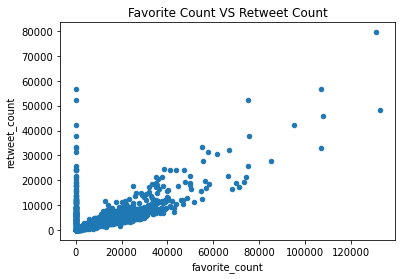

In [89]:
# 1. Favorite count VS retweet count
master_clean.plot(kind='scatter', x='favorite_count', y='retweet_count').set_title('Favorite Count VS Retweet Count')

In [90]:
master_clean.dog_stage.value_counts()

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

In [91]:
master_clean.groupby('dog_stage')['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,83.0,15694.963855,20577.672209,0.0,5075.00,10342.0,16390.00,131075.0
doggofloofer,1.0,17169.000000,NaN,17169.0,17169.00,17169.0,17169.00,17169.0
doggopupper,12.0,10064.250000,11503.736667,0.0,6177.25,8354.0,9861.25,44619.0
doggopuppo,1.0,47844.000000,NaN,47844.0,47844.00,47844.0,47844.00,47844.0
floofer,9.0,11064.444444,10680.460853,1618.0,4015.00,6076.0,12456.00,33345.0
pupper,244.0,6588.049180,10258.445710,0.0,2112.75,3139.5,7158.50,106827.0
puppo,29.0,17204.586207,25827.185793,0.0,4624.00,10132.0,19476.00,132810.0


Text(0, 0.5, 'Favorite Count')

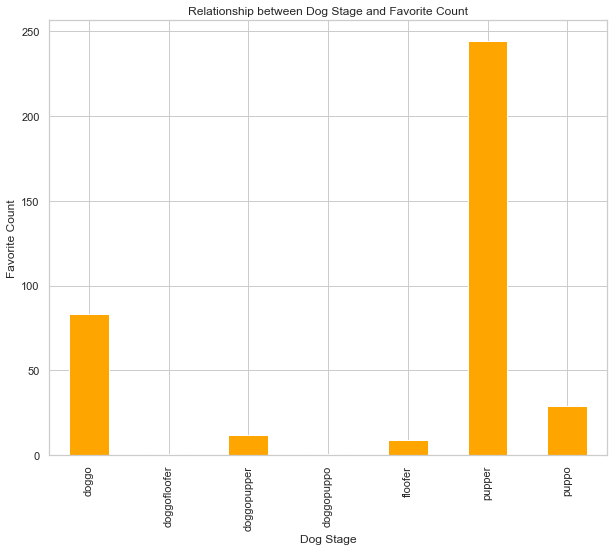

In [101]:
plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
master_clean.groupby("dog_stage")['favorite_count'].count().plot(kind='bar', color='orange');
plt.title('Relationship between Dog Stage and Favorite Count')
plt.xlabel('Dog Stage')
plt.ylabel('Favorite Count')

In [93]:
master_clean.groupby('dog_stage')['retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,83.0,7520.253012,13115.830245,39.0,1994.00,3472.0,5757.0,79515.0
doggofloofer,1.0,3433.000000,NaN,3433.0,3433.00,3433.0,3433.0,3433.0
doggopupper,12.0,5071.083333,5901.455097,1265.0,2365.00,2761.0,3520.0,17621.0
doggopuppo,1.0,19196.000000,NaN,19196.0,19196.00,19196.0,19196.0,19196.0
floofer,9.0,4155.888889,5590.254566,496.0,1141.00,2509.0,3825.0,18497.0
pupper,244.0,2879.467213,4508.825432,26.0,695.75,1295.0,3257.0,32883.0
puppo,29.0,6146.137931,9138.288613,179.0,1483.00,3220.0,8536.0,48265.0


Text(0, 0.5, 'Retweet Count')

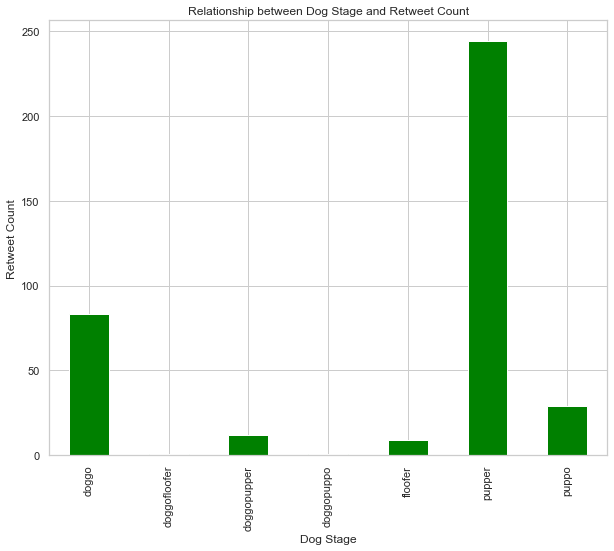

In [102]:
plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
master_clean.groupby("dog_stage")['retweet_count'].count().plot(kind='bar', color='Green');
plt.title('Relationship between Dog Stage and Retweet Count')
plt.xlabel('Dog Stage')
plt.ylabel('Retweet Count')

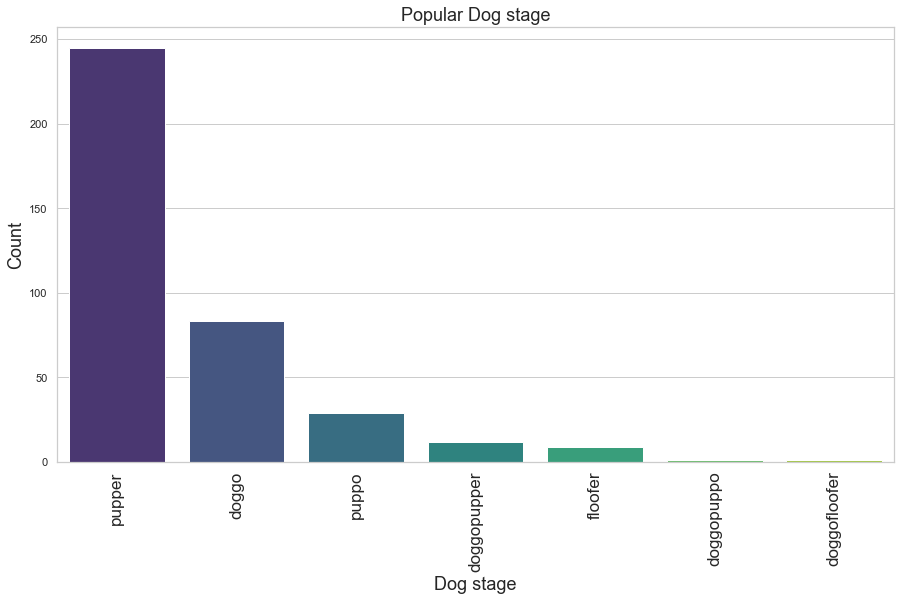

In [95]:
# High popular dog stage count tweets
plt.figure(figsize = (15,8))
ax = sns.barplot(x = master_clean['dog_stage'].value_counts()[0:10].index,
            y =master_clean['dog_stage'].value_counts()[0:10],
            data = master_clean, palette='viridis' );
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 17);
plt.xlabel("Dog stage",fontsize = 18);
plt.ylabel("Count",fontsize = 18);
plt.title("Popular Dog stage",fontsize = 18);

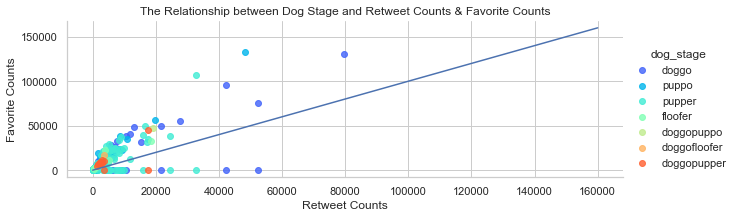

In [96]:
#What is the relationship between dog stages and retweet counts and favorite counts ?
g = sns.FacetGrid(data = df_final , hue = 'dog_stage', aspect = 3, palette='rainbow')
g = g.map( sns.regplot, 'retweet_count', 'favorite_count',  x_jitter = 0.08, fit_reg = False);
g.add_legend()
plt.xlabel('Retweet Counts')
plt.ylabel('Favorite Counts')
plt.title('The Relationship between Dog Stage and Retweet Counts & Favorite Counts')
plt.plot([0, 160000], [0, 160000], '-')
